In [1]:
import sys
sys.path.append("../simcmb/")
sys.path.append("../simcmb/settings/")

In [2]:
import camb_ps_maker as cpm
import yam_io as yi
import clplotting

from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
Yd0 = yi.Ydict("../simcmb/settings/planck_2018_1e4.yaml")
PM0 = cpm.PS_Maker(Yd0)

In [4]:
cl0 = PM0.get_cls(PM0.Ydict.pars)

from 12:56:40.119384 P to 12:56:41.576336 P or 1.456952 seconds total


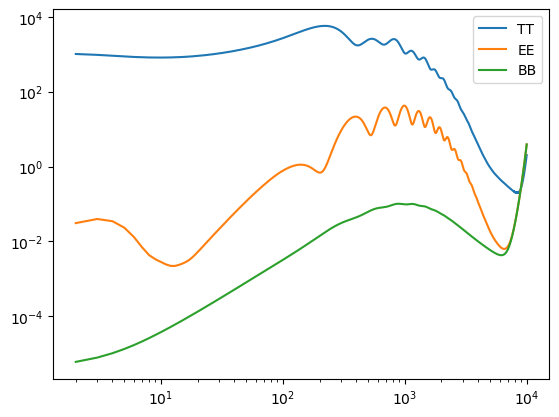

In [5]:
plt.plot(cl0['l'][2:], cl0['clTT'][2:], label='TT')
plt.plot(cl0['l'][2:], cl0['clEE'][2:], label='EE')
plt.plot(cl0['l'][2:], cl0['clBB'][2:], label='BB')
plt.loglog()
plt.legend()
plt.show()

In [6]:
PM0.update_vals('noise_level', 8, incamb=False)

In [7]:
cl1 = PM0.get_cls(PM0.Ydict.pars)

from 12:56:41.912735 P to 12:56:43.331126 P or 1.418391 seconds total


In [8]:
PM0.update_vals('beam_fwhm', 6, incamb=False)

In [9]:
cl2 = PM0.get_cls(PM0.Ydict.pars)

from 12:56:43.338308 P to 12:56:44.535515 P or 1.197207 seconds total


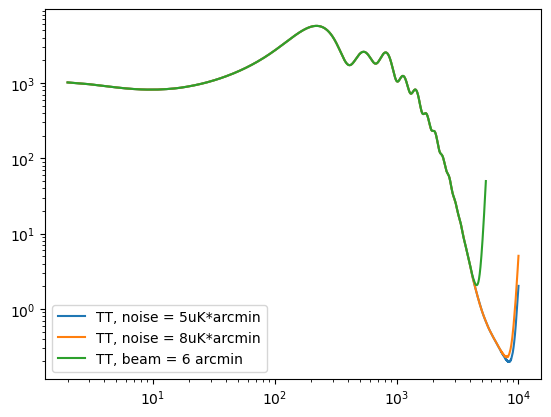

In [10]:
plt.plot(cl0['l'][2:], cl0['clTT'][2:], label='TT, noise = 5uK*arcmin')
plt.plot(cl1['l'][2:], cl1['clTT'][2:], label='TT, noise = 8uK*arcmin')
plt.plot(cl2['l'][2:], cl2['clTT'][2:], label='TT, beam = 6 arcmin')
plt.loglog()
plt.legend()
plt.show()

In [11]:
f1 = clplotting.flatmap(192, 5, cl_dict=cl0)

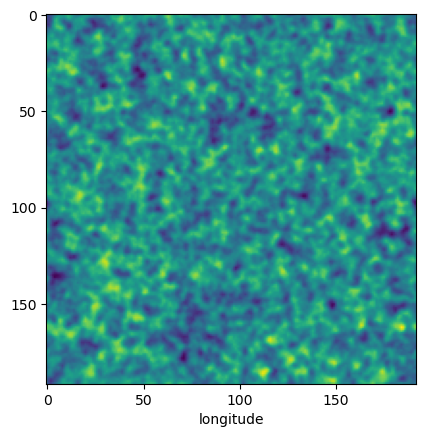

In [12]:
plt.imshow(f1.flatmap('T', seed = 0)[0])
plt.xlabel("longitude")
plt.xticks(range(0,200,50))
plt.yticks(range(0,200,50))
plt.show()

In [13]:
np.sum(f1.flatmap('T', seed = 0)[0] - f1.flatmap('T', seed = 0)[0]),\
np.sum(f1.flatmap('T', seed = 1)[0] - f1.flatmap('T', seed = 0)[0])

(-1.1641532182693481e-09, -2192.295799610205)

In [14]:
f1.flatmap('TEB').shape

(3, 192, 192)

In [15]:
f1.flatmap('TQU').shape

(3, 192, 192)

In [16]:
f2 = clplotting.flatmap(192, 5)
f2.flatmap('what')

if you don't want to restrict to a `cl_dict` dictionary, use `self._flatmap` instead


In [17]:
f1.flatmap('E'), f1.flatmap('EE'), f1.flatmap('clEE')

(array([[[ 3281.44452866,  1810.06161391,  1069.48228672, ...,
          -1856.77047241,   983.91906775,  2837.73819518],
         [ 5939.68055528,  3303.99210367,  1375.69422555, ...,
            109.90625657,  3201.24656894,  6423.54709184],
         [ 5673.94617758,  1895.92218584,    50.22247036, ...,
            275.96078599,  4075.32348763,  6082.68979895],
         ...,
         [-3976.47036782, -1996.1972546 ,  -329.00242134, ...,
          -2596.66326998, -3583.56820181, -3326.992196  ],
         [-2633.74782459, -2717.05555388, -1339.4374161 , ...,
          -4062.75680118, -3730.12512294, -3611.87637076],
         [ -527.73261621,  -541.06040301,  -244.94849089, ...,
          -2848.67935221, -2278.794168  ,  -551.83388469]]]),
 array([[[-9.98727210e+02, -2.11462311e+03, -1.87747189e+03, ...,
           7.61811324e+02,  1.56581633e+03,  6.76190858e+02],
         [ 1.04497983e+03,  5.09545237e+00, -1.27718751e+02, ...,
           1.65999232e+03,  2.62244562e+03,  2.32411802e+

In [18]:
f1.flatmap('K')

not a valid map specification
